In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

#**Load Image**

In [2]:
def read_file(fn):
    img = cv2.imread(fn)
    img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
    plt.axes(projection=None,polar=False)
    plt.imshow(img)
    plt.show()
    return img

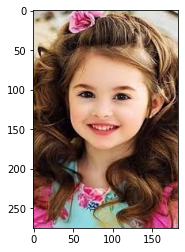

In [3]:
fn = "/content/img.jpg"
img = read_file(fn)
org_img = np.copy(img)

# **Create Edge Mask**

In [4]:
def edge_mask(img , line_size , blur_value):
    gray = cv2.cvtColor(img , cv2.COLOR_RGB2GRAY)
    gray_blur = cv2.medianBlur(gray,blur_value)
    edges = cv2.adaptiveThreshold(gray_blur,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,line_size,blur_value)
    return edges

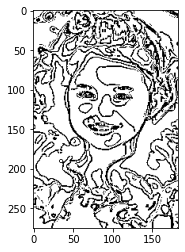

In [12]:
line_size = 5
blur_value = 5
edges = edge_mask(img , line_size , blur_value)
plt.imshow(edges,cmap="gray")
plt.show()

# **Reduce the Color Palette**

In [6]:
def color_quantization(img ,k):
    data = np.float32(img).reshape((-1,3))
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,20,0.001)
    #implementing K-Means
    ret , label ,center = cv2.kmeans(data,k,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    res = center[label.flatten()]
    res = res.reshape(img.shape)
    return res

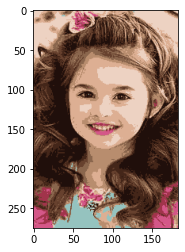

In [7]:
img = color_quantization(img , k=10)
plt.imshow(img)
plt.show()

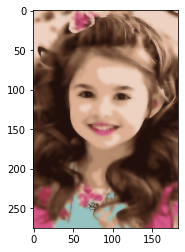

In [8]:
#Reduce the noise
blurred = cv2.bilateralFilter(img , d=7 ,sigmaColor = 200 , sigmaSpace = 200 )
plt.imshow(blurred)
plt.show()

# **Combine Edge Mask with Quantiz Image**

In [9]:
def cartoon():
    c = cv2.bitwise_and(blurred , blurred , mask = edges )
    plt.imshow(org_img)
    plt.title("ORIGINAL IMAGE")
    plt.show()
    plt.imshow(c)
    plt.title("CARTOON IMAGE")
    plt.show()

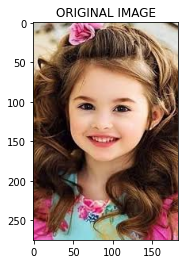

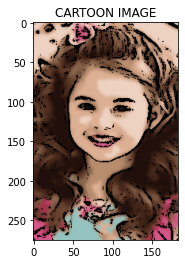

In [10]:
cartoon()